<a href="https://colab.research.google.com/github/dlwogns/ML-DL/blob/main/GoDaddy%20-%20Microbusiness%20Density%20Forecasting/rnn_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler

In [2]:
#train parameters
seq_length = 7 # 일주일을 기준으로 삼았으므로 7이다.
data_dim = 5 # column이 open, high, low, volume, close 총 다섯개 이므로 5이다.
output_dim = 1 # 일주일을 넣고, 그 다음 하루를 예측하므로 1
learning_rate = 0.01
iterations = 500

In [8]:
xy = np.loadtxt("/content/drive/MyDrive/data/data-02-stock_daily.csv", delimiter=',')
xy = xy[::-1] # 시계열을 위해 reverse해준다.

In [9]:
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

In [10]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [11]:
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [14]:
def build_dataset(time_series, seq_length):
  dataX = []
  dataY = []
  for i in range(0, len(time_series) - seq_length):
    x = time_series[i:i + seq_length, :]
    y = time_series[i + seq_length, [-1]] #Next close price
    #print(x, "->",y)
    dataX.append(x)
    dataY.append(y)
  return np.array(dataX), np.array(dataY)

In [15]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

In [16]:
tf.model = tf.keras.Sequential()

In [17]:
tf.model.add(tf.keras.layers.LSTM(units=1, input_shape = (seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units=output_dim, activation='tanh'))

In [18]:
tf.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 28        
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [19]:
tf.model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
tf.model.fit(trainX, trainY, epochs=iterations)

Epoch 1/500
16/16 [==============================] - 2s 6ms/step - loss: 0.0704
Epoch 2/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0310
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 7/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 8/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 9/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 10/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 11/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 12/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 13/500
16/16 [=================

7/7 [==============================] - 0s 3ms/step


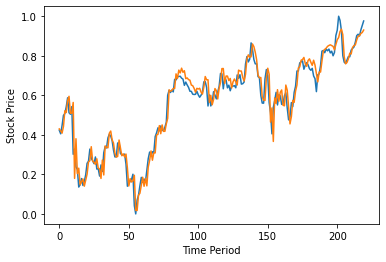

In [21]:
# Test step
test_predict = tf.model.predict(testX)

# Plot predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()